# **PARTE 1: Exploraci√≥n inicial del dataset (EDA)**

Cargamos el dataset original


## **1.1 Carga del Dataset**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../')

import utils.bootcampviztools as btz
import utils.utils as ut

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\ML\Wholesale customers data.csv")

df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

## **1.2 Descripci√≥n de variables**

| Nombre de columna     | Tipo de variable | Descripci√≥n                                                | Comentarios |
|----------------------|----------------|------------------------------------------------------------|-------------|
| Channel             | Categ√≥rica      | Canal de venta del cliente (Horeca(hotel, restaurante, cafe) o Minorista) | Convertido a categ√≥rico |
| Region              | Categ√≥rica      | Regi√≥n geogr√°fica del cliente (Lisboa, Oporto, Otro)      | Convertido a categ√≥rico |
| Fresh               | Num√©rica        | Gasto en productos frescos                                | Transformado logar√≠tmicamente |
| Milk                | Num√©rica        | Gasto en productos l√°cteos                                | Transformado logar√≠tmicamente |
| Grocery             | Num√©rica        | Gasto en productos de supermercado                        | Transformado logar√≠tmicamente |
| Frozen              | Num√©rica        | Gasto en productos congelados                             | Transformado logar√≠tmicamente |
| Detergents_Paper    | Num√©rica        | Gasto en productos de limpieza y papel                    | Transformado logar√≠tmicamente |
| Delicassen          | Num√©rica        | Gasto en productos de delicatessen                        | Transformado logar√≠tmicamente |


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [3]:
ut.data_report(df)

COL_N         Channel Region  Fresh   Milk Grocery Frozen Detergents_Paper  \
DATA_TYPE       int64  int64  int64  int64   int64  int64            int64   
MISSINGS (%)      0.0    0.0    0.0    0.0     0.0    0.0              0.0   
UNIQUE_VALUES       2      3    433    421     430    426              417   
CARDIN (%)       0.45   0.68  98.41  95.68   97.73  96.82            94.77   

COL_N         Delicassen  
DATA_TYPE          int64  
MISSINGS (%)         0.0  
UNIQUE_VALUES        403  
CARDIN (%)         91.59

## **1.3 Variables categ√≥ricas**

Ambas tienen baja cardinalidad, por lo que ser√°n tratadas como variables categ√≥ricas.


In [4]:
df['Channel'] = df['Channel'].astype('object')
df['Region'] = df['Region'].astype('object')


In [5]:
features_cat = ut.get_features_cat(df)
features_cat

['Channel', 'Region']

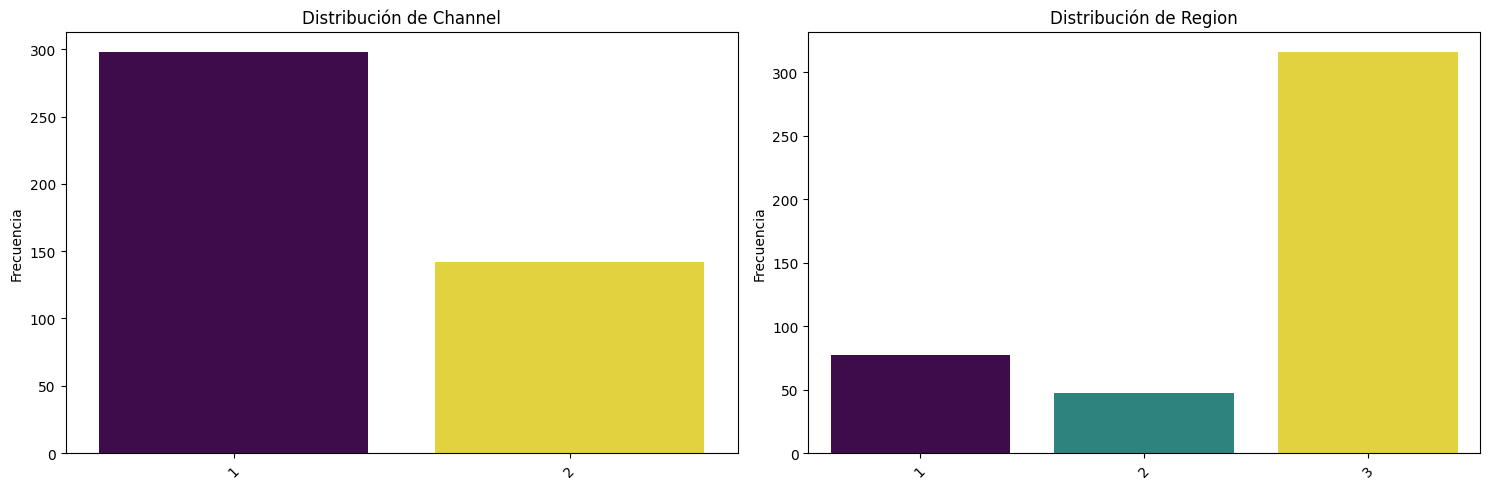

In [6]:
btz.pinta_distribucion_categoricas(df, features_cat)

- `Channel` tiene dos categor√≠as: Horeca (1) y Retail (2).
- `Region` tiene tres regiones.


## **1.4 Variables num√©ricas + Skewness**

Las variables num√©ricas presentan distribuciones muy sesgadas hacia la derecha, lo que puede afectar al clustering.


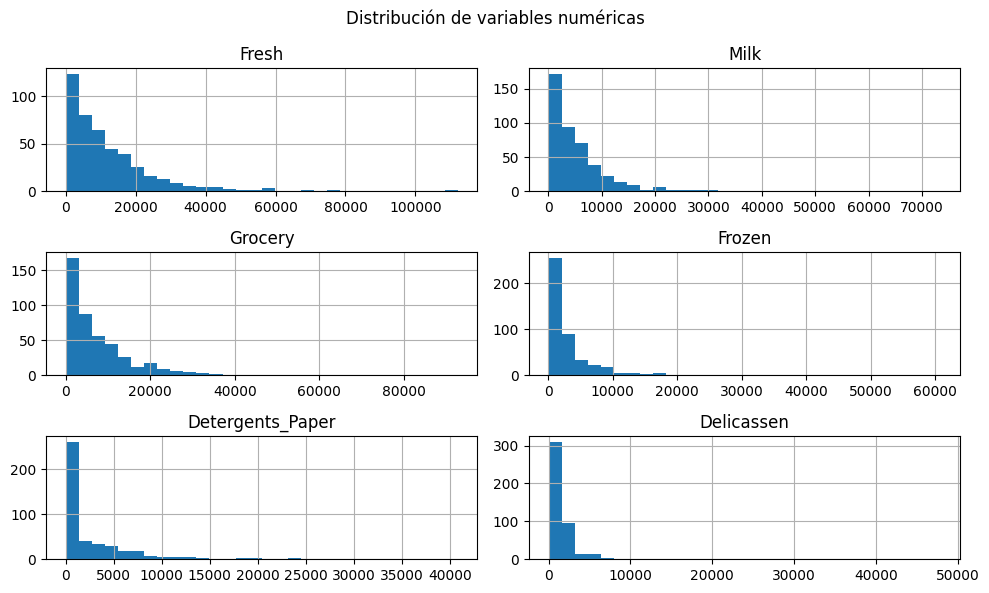

In [7]:
features_num = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[features_num].hist(bins=30, figsize=(10,6))
plt.suptitle("Distribuci√≥n de variables num√©ricas")
plt.tight_layout()
plt.show()


In [8]:
df.skew().sort_values(ascending= False)

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
Channel              0.760951
Region              -1.283627
dtype: object

- La mayor√≠a de las variables est√°n  sesgadas hacia la derecha.
- Tiene sentido, unos pocos clientes gastan mucho m√°s que el resto.
- Este sesgo puede afectar a algoritmos como K-Means. Por eso hacemos una transformaci√≥n logar√≠tmica.

## **1.5 An√°lisis de outliers**


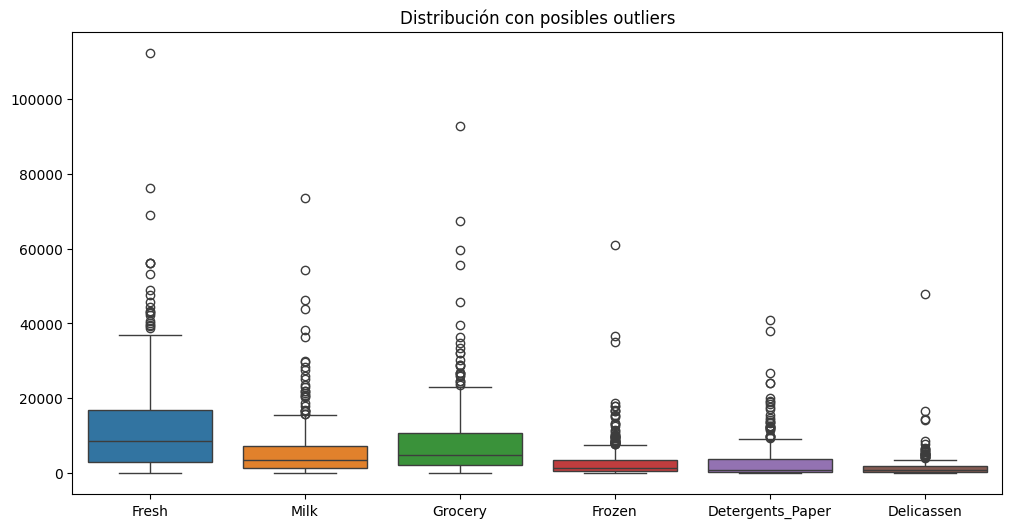

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features_num])
plt.title("Distribuci√≥n con posibles outliers")
plt.show()

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df < lower_bound) | (df > upper_bound))
outliers_count = outliers_iqr.sum()

print("N√∫mero de outliers por variable (IQR):")
print(outliers_count)

print(f"Filas con al menos un outlier: {outliers_iqr.any(axis=1).sum()} de {len(df)}")

N√∫mero de outliers por variable (IQR):
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64
Filas con al menos un outlier: 108 de 440


- Las variables num√©ricas tienen bastantes outliers
- Tenemso que hacer transformaciones como logaritmos o escalado

## **1.6 Correlaci√≥n entre variables**

In [11]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_selected = df[features]

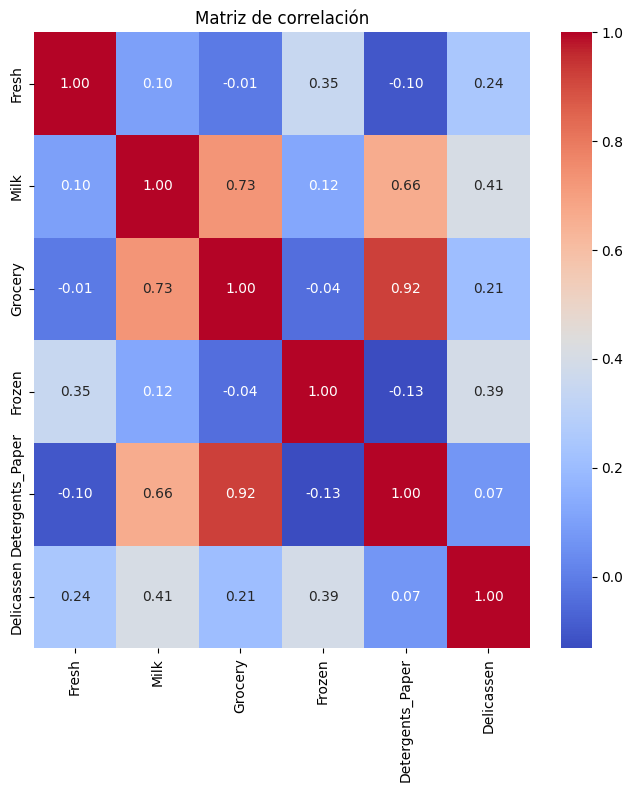

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[features_num].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de correlaci√≥n")
plt.show()


Correlaciones altas entre:
- **Grocery y Detergents_Paper** (‚âà 0.92)
- **Milk y Grocery** (‚âà 0.73)
- **Milk y Detergents_Paper** (‚âà 0.66)


## **1.7 Transformaciones (Log + Escalado)**

In [13]:
df_log = np.log1p(df[features_num])

scaler = MinMaxScaler()
df_scaled_log = pd.DataFrame(scaler.fit_transform(df_log), columns=features_num)

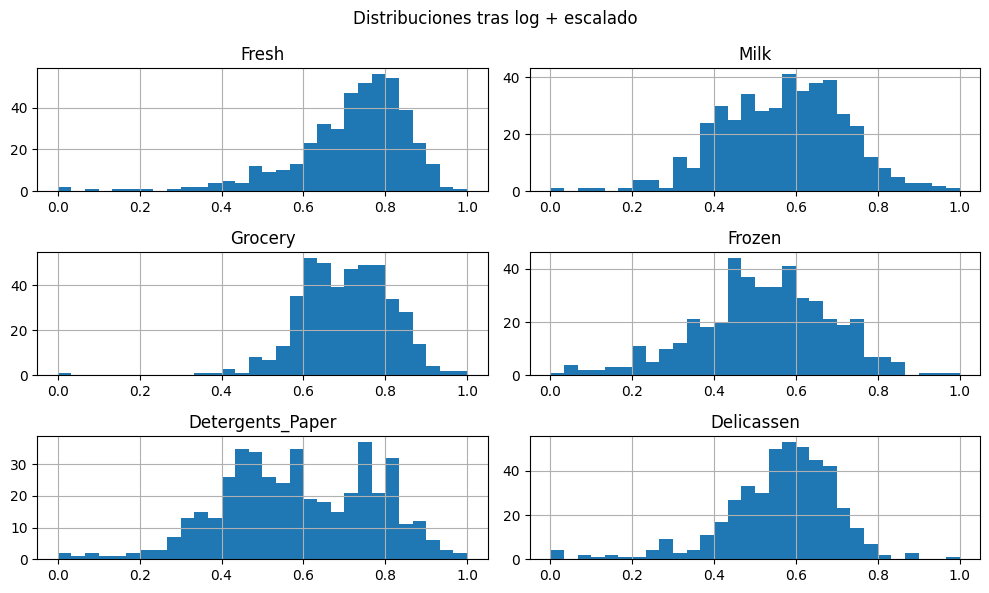

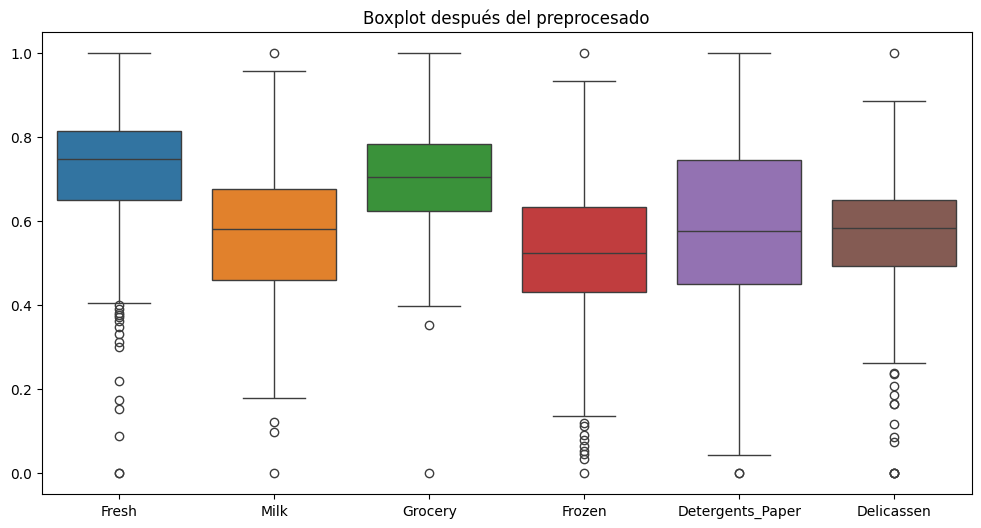

In [14]:
df_scaled_log.hist(bins=30, figsize=(10,6))
plt.suptitle("Distribuciones tras log + escalado")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled_log)
plt.title("Boxplot despu√©s del preprocesado")
plt.show()


- Hacemos `log1p` a las variables num√©ricas para reducir la asimetr√≠a y los outliers.
- Usamos`MinMaxScaler` para escalar todas las variables entre 0 y 1.

## **1.8 Dataset final limpio**

Unimos la parte num√©rica transformada con la variable categ√≥rica `Channel`.  
La columna `Region` se elimina porque no aporta informaci√≥n relevante tras el an√°lisis.



In [15]:
df_encoded = pd.get_dummies(df['Channel'], prefix='Channel', drop_first=True)

df_final = pd.concat([df_scaled_log.reset_index(drop=True), df_encoded], axis=1)

df_final.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.787076  0.717315  0.750579  0.272291          0.704748    0.619005   
1  0.729947  0.719518  0.773997  0.543498          0.727298    0.649139   
2  0.719687  0.704513  0.752184  0.583577          0.734394    0.807256   
3  0.791565  0.426513  0.692596  0.709778          0.524784    0.649856   
4  0.843653  0.636636  0.745685  0.646361          0.660499    0.763182   

   Channel_2  
0       True  
1       True  
2       True  
3      False  
4       True

In [16]:
df_final.to_csv(r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\data_sample\wholesale_customers_final.csv", index=False)

# **PARTE 2: Clustering Analysis - Con y Sin PCA** 

### **2.1 KMeans sin PCA (codo + silhouette)**

In [17]:
X = df_final.copy()

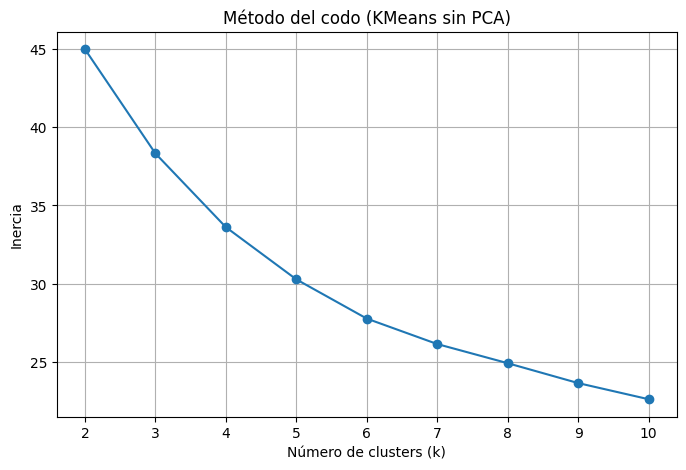

In [18]:
inertia = []
k_range = range(2, 11) 

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)  
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("M√©todo del codo (KMeans sin PCA)")
plt.xlabel("N√∫mero de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

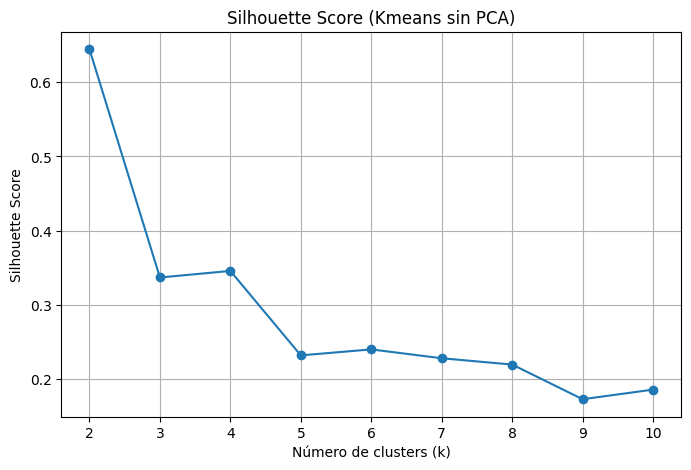

In [19]:
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouettes.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouettes, marker='o')
plt.title("Silhouette Score (Kmeans sin PCA)")
plt.xlabel("N√∫mero de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

- Aplicamos el algoritmo K-Means directamente sobre los datos escalados y transformados.
- Probamos con valores de `k` de 2 a 10.
- Con el **m√©todo del codo** observamos la inercia.
- Calculamos **Silhouette Score** para evaluar la calidad de los clusters.
- `k=2` da la mejor separaci√≥n de grupos.


###  **2.2 Evaluaci√≥n KMeans sin PCA**

Calculamos el Silhouette Score para los valores de `k=2`, `k=3` y `k=4`. 

El mejor resultado es con `k=2`, por lo que este ser√° el valor de referencia para comparar con otros algoritmos de clustering.


In [20]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(X)
df_final["Cluster_2"] = labels_2

score_2 = silhouette_score(X, labels_2)
print(f"Silhouette Score (k=2): {score_2:.3f}")

Silhouette Score (k=2): 0.644


In [21]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(X)
df_final["Cluster_3"] = labels_3

score_3 = silhouette_score(X, labels_3)
print(f"Silhouette Score (k=3): {score_3:.3f}")

Silhouette Score (k=3): 0.337


In [22]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(X)
df_final["Cluster_4"] = labels_4

score_4 = silhouette_score(X, labels_4)
print(f"Silhouette Score (k=4): {score_4:.3f}")

Silhouette Score (k=4): 0.346


In [23]:
cols_originales = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel_2']

df_cluster2 = df_final.drop(columns=["Cluster_3", "Cluster_4"], errors='ignore')

df_cluster2.groupby("Cluster_2")[cols_originales].mean().style.highlight_max(axis=0)

###  **2.3 PCA (an√°lisis de varianza)**

Aplicamos PCA para reducir las dimensiones del dataset y facilitar la visualizaci√≥n de los clusters. Con s√≥lo 4 componentes se conserva m√°s del 90% de la varianza-


In [24]:
# PCA exploratorio (para calcular cu√°nta varianza explican todas las componentes)
pca = PCA()
x_pca = pca.fit_transform(X)

Varianza explicada por cada componente: [0.72267852 0.10498056 0.06662707 0.04075552 0.03583427 0.02130447
 0.00781958]
Varianza acumulada: [0.72267852 0.82765909 0.89428616 0.93504168 0.97087595 0.99218042
 1.        ]


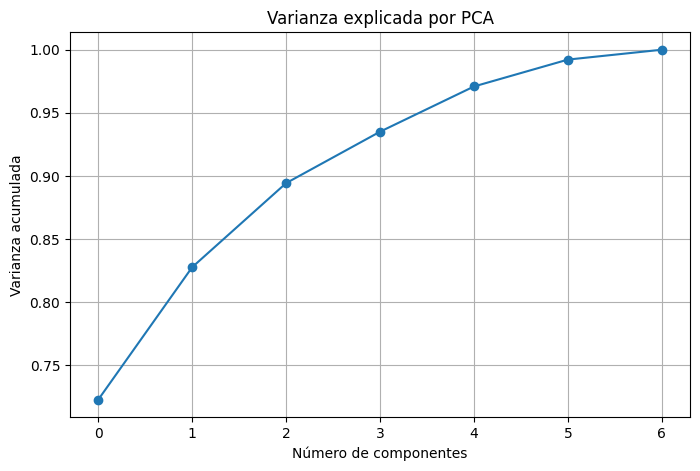

In [25]:
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Varianza acumulada:", np.cumsum(explained_variance))

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('N√∫mero de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()

Con solo 2 o 3 componentes tenemos la mayor parte de la informaci√≥n relevante.  

Elegimos 4 componentes para asegurar que no perdemos demasiada info.


### **2.4 KMeans con PCA**

In [26]:
# Reducimos a 4 componentes
pca_final = PCA(n_components=4)
X_pca = pca_final.fit_transform(X)

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

df_final["Cluster_PCA"] = labels_pca

silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA + KMeans, k=2): {silhouette_pca:.3f}")

Silhouette Score (PCA + KMeans, k=2): 0.690


El Silhouette Score con PCA es un poco mayor al sin PCA

### **2.5 Visualizaci√≥n Clusters**


Usamos los dos primeros componentes principales para representar los datos en dos dimensiones y ver c√≥mo se distribuyen los clientes seg√∫n su cluster. 


In [27]:
X_pca_2d = X_pca[:, :2] 

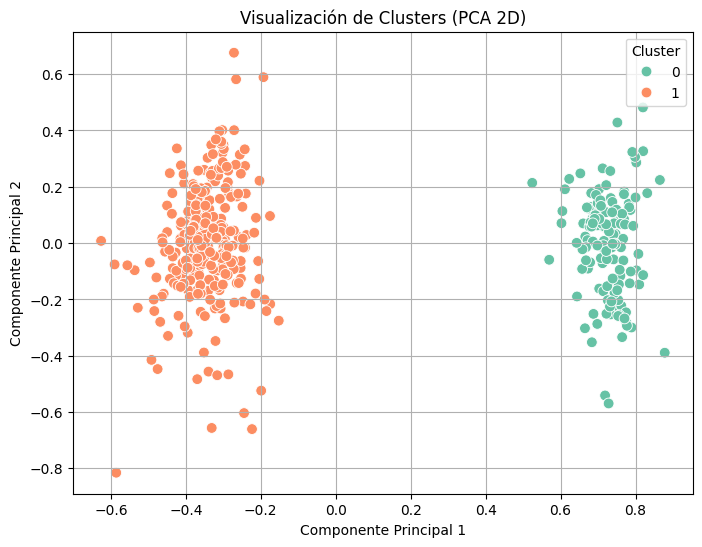

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=df_final["Cluster_PCA"],
    palette='Set2',
    s=60
)
plt.title("Visualizaci√≥n de Clusters (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Una vez realizados los clusters, analizamos las caracter√≠sticas **promedio** de cada grupo, para crear perfiles de cliente. 


In [29]:
cols_originales = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel_2']

df_final[cols_originales + ['Cluster_PCA']].groupby("Cluster_PCA").mean().style.highlight_max(axis=0)

- **Cluster 0** tiene un mayor gasto en:
  - `Grocery`, `Milk` y `Detergents_Paper`, por lo que probablemnete son los **clientes tipo retail** (tiendas o supermercados)..
- **Cluster 1** consume m√°s de `Fresh` y `Frozen`, y menos en productos de supermercado. Podr√≠a representar a restaurantes, hoteles, etc.

Comparamos los resultados k-means con PCA, y sin √©l, usando los datos reducidos a 2 dimensiones. Esto nos permite ver qu√© tan bien est√°n separados los grupos en cada caso.


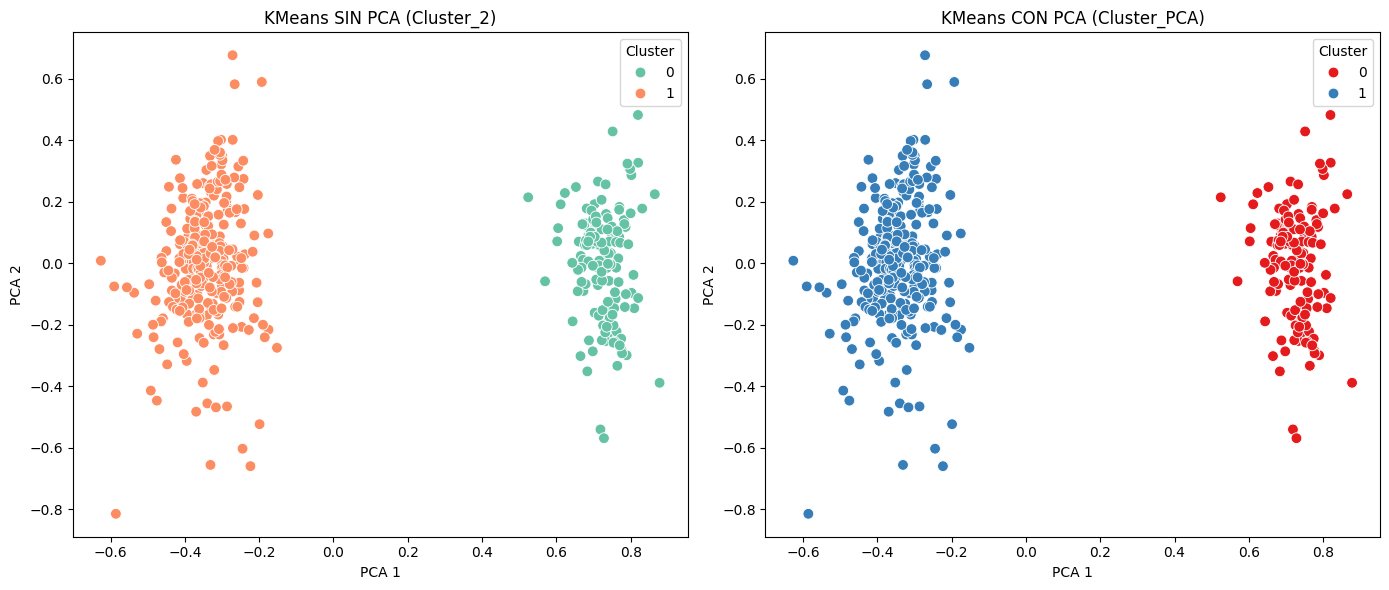

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualizaci√≥n de KMeans sin PCA
sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df_final["Cluster_2"],
    palette='Set2', s=60, ax=axes[0]
)
axes[0].set_title("KMeans SIN PCA (Cluster_2)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].legend(title="Cluster")

# Visualizaci√≥n de KMeans con PCA
sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df_final["Cluster_PCA"],
    palette='Set1', s=60, ax=axes[1]
)
axes[1].set_title("KMeans CON PCA (Cluster_PCA)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()


### **2.6 DBSCAN & Agglomerative**

Probamos otros modelos como DBSCAN y Agglomerative Clustering con K-Means. 


In [31]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca_2d)

df_final["Cluster_DBSCAN"] = labels_dbscan

n_noise = np.sum(labels_dbscan == -1)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Silhouette Score solo si hay m√°s de un cluster v√°lido
if n_clusters_dbscan > 1:
    score_dbscan = silhouette_score(X_pca_2d[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f} (Outliers: {n_noise})")
else:
    score_dbscan = -1
    print("DBSCAN no encontr√≥ clusters v√°lidos")


Silhouette Score (DBSCAN): 0.789 (Outliers: 1)


In [32]:
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_pca_2d)

df_final["Cluster_Agglo"] = labels_agglo

score_agglo = silhouette_score(X_pca_2d, labels_agglo)
print(f"Silhouette Score (Agglomerative, k=2): {score_agglo:.3f}")


Silhouette Score (Agglomerative, k=2): 0.787


### **2.7 Comparaci√≥n de modelos**

Comparamos los resultados de los tres algoritmos de clustering usando los datos reducidos a 2 dimensiones.

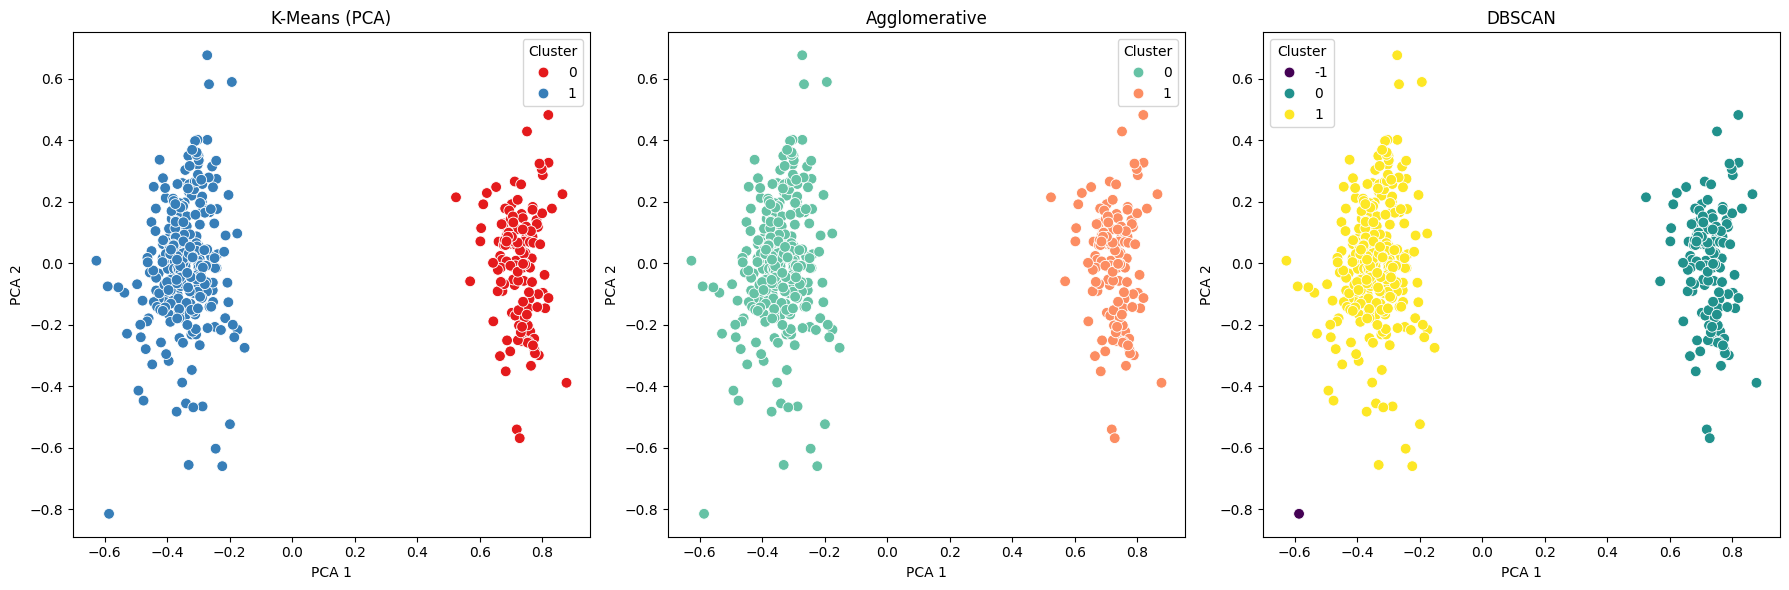

In [33]:
plt.figure(figsize=(18, 6))

# K-Means con PCA
plt.subplot(1, 3, 1)
sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df_final["Cluster_PCA"],
    palette='Set1', s=60
)
plt.title("K-Means (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df_final["Cluster_Agglo"],
    palette='Set2', s=60
)
plt.title("Agglomerative")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df_final["Cluster_DBSCAN"],
    palette='viridis', s=60
)
plt.title("DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [34]:
print(f"Silhouette Score (PCA + KMeans, k=2): {silhouette_pca:.3f}")
print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f}")
print(f"Silhouette Score (Agglomerative, k=2): {score_agglo:.3f}")

Silhouette Score (PCA + KMeans, k=2): 0.690
Silhouette Score (DBSCAN): 0.789
Silhouette Score (Agglomerative, k=2): 0.787


Aunque DBSCAN y Agglomerative tienen mejores Silhouette Scores, elegimos **KMeans con PCA** como modelo final:

- Simplicidad
- Buena separaci√≥n de los grupos
- Es m√°s estable que DBSCAN
- Ayuda a interpretar perfiles de cliente m√°s f√°cilemnte.

In [35]:
import joblib

joblib.dump(kmeans_pca, r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\models\kmeans_pca_model.pkl")
joblib.dump(dbscan, r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\models\dbscan_model.pkl")
joblib.dump(agglo, r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\models\agglomerative_model.pkl")

joblib.dump(pca_final, r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\models\pca_model.pkl")

print("Modelos guardados correctamente.")


Modelos guardados correctamente.


### **2.8 Conclusiones**

El proyecto ha consistido en:

1. **EDA y preprocesado**:
   - Encontramos variables num√©ricas con alta asimetr√≠a hac√≠a la derecha y outliers.
   - Aplicamos transformaci√≥n logar√≠tmica + escalado.
   - Eliminamos la variable `Region`.
   - Codificamos `Channel`.

2. **Clustering con diferentes enfoques**:
   - **KMeans** con y sin reducci√≥n de dimensi√≥n con PCA.
   - **DBSCAN** y **Agglomerative Clustering**.
   - Todos los modelos son evaluados con **Silhouette Score**.
---

### üìä **Comparaci√≥n de Modelos de Clustering**

| Algoritmo               | Silhouette Score | Observaciones                                                             |
|-------------------------|------------------|---------------------------------------------------------------------------|
| **KMeans (sin PCA)**    | 0.64             | Buen resultado              |
| **KMeans (con PCA)**    | 0.69             | Mejora                           |
| **DBSCAN**              | 0.79             | Mejor resultado, pero muy sensible a los par√°metros y hay ruido|
| **Agglomerative**       | 0.78             | Muy buen resultado                        |

---

### ‚úÖ **Modelo Final Elegido**

Optamos por **KMeans con PCA (k=2)** como modelo final por su:

- estabilidad
- simplicidad
- interpretabilidad

---

### üîÑ **Posibles Mejoras y Futuros Pasos**

Aunque el modelo final est√° bien, hay oportunidades para mejorar y extender este an√°lisis:

1. **Optimizaci√≥n de par√°metros**:
   - Ajustar los hiperpar√°metros de DBSCAN (`eps`, `min_samples`) usando un grid searcht.
   - Explorar m√°s valores de `k` para KMeans o usar m√©todos autom√°ticos.

2. **Detecci√≥n y tratamiento de outliers**:
   - Investigar t√©cnicas de *outlier detection* previas al clustering.
   - Evaluar el impacto de eliminar outliers sobre los resultados de clustering.

---

### üéØ **Conclusi√≥n**

Este proyecto demuestra c√≥mo t√©cnicas de reducci√≥n de dimensionalidad y distintos algoritmos de clustering pueden combinarse para crear una **segmentaci√≥n de clientes**. Esto puede facilitar mejores decisiones en marketing, atenci√≥n personalizada y dise√±o de productos.
